   In this exercise, we are continuing digit handwriting recognition through MNIST dataset with advanced features of TensorFlow: [tensorboard](https://www.tensorflow.org/tensorboard/get_started) and transfer learning.

In [2]:
%load_ext tensorboard

In [22]:
import numpy as np
import tensorflow as tf
import datetime

from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib import pyplot as plt

NUM_OF_CLASSES = 10

In [23]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [25]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
#     Dense(200, activation='relu', input_shape=(28, 28)),
#     Flatten(),
#     Dense(150, activation='relu'),
#     Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
# opt = Adam(lr=0.005) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [33]:
history = model.fit(x=x_train, y=y_train, batch_size=28, epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/5
   1/2143 [..............................] - ETA: 0s - loss: 2.4892 - accuracy: 0.0357WARNING:tensorflow:From /Users/changsin/workplace/DeepLearning-101/venv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2143/2143 [==============================] - 10s 5ms/step - loss: 0.2174 - accuracy: 0.9359 - val_loss: 0.0951 - val_accuracy: 0.9714
Epoch 2/5
2143/2143 [==============================] - 10s 5ms/step - loss: 0.0968 - accuracy: 0.9708 - val_loss: 0.0864 - val_accuracy: 0.9747
Epoch 3/5
2143/2143 [==============================] - 11s 5ms/step - loss: 0.0693 - accuracy: 0.9784 - val_loss: 0.0753 - val_accuracy: 0.9772
Epoch 4/5
2143/2143 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9819 - val_loss: 0.0653 - val_accuracy: 0.9808
Epoch 5/5
2143/2143 [==

In [34]:
%tensorboard --logdir logs/fit

In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9787


[0.07406874746084213, 0.9786999821662903]

In [39]:
model.save('./mnist-weights.hd5')

INFO:tensorflow:Assets written to: ./mnist-weights.hd5/assets


In [40]:
CLASSES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

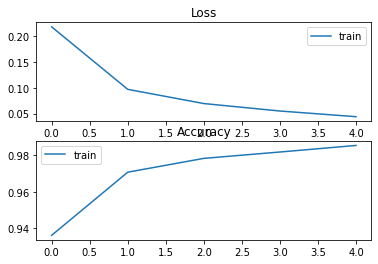

In [41]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

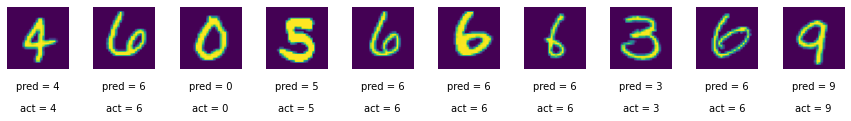

In [42]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)